In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
import datetime as dt
import matplotlib.ticker as mticker
import geopandas as gpd
import pandas as pd
import xarray as xr
from netCDF4 import Dataset
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Polygon
import calendar
# import h5py
from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
                 cartopy_xlim, cartopy_ylim, ALL_TIMES, extract_times, g_times,
                 interpline, CoordPair, xy_to_ll, ll_to_xy, vertcross)
from shapely.geometry.polygon import Polygon
import wrf
import scipy.stats as sps
import matplotlib as mpl
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors

In [8]:
wrf_path_base = '/gws/nopw/j04/klingaman/baracoma/WRF/out/runs/'
path_out = '/home/users/baracoma/notebooks/wrf_expts/paper2/'
lf_list = pd.read_pickle(os.path.join(path_out,'lf_list_intensitywithmntrain.pkl'))
lf_list = lf_list.reindex(['KOPPU', 'NESAT', 'MEGI', 'IMBUDO', 'CIMARON', 'BEBINCA', 'NARI', 'PRAPIROON'])
exptnames = {'orig': 'Control', 'enha':'Enhanced Topography', 'redu': 'Reduced Topography'}

crs = ccrs.PlateCarree()
lat_min = 13
lat_max = 19
lon_min = 118
lon_max = 125

In [4]:
lf_list

,SID,LF Year,LF Month,LF Date,LF Hour,o_ts,r_ts,e_ts,vmax,DateStr,...,lon_r,lat_r,lon_e,lat_e,rain_o,rain_e,rain_r,rain_mnt_o,rain_mnt_e,rain_mnt_r
NAME,,,,,,,,,,,,,,,,,,,,,
KOPPU,2015285N14151,2015,10,16,21,30,30,30,2000,2015-10-16 21:00:00,...,"[115.90791320800781, 136.67230224609375, 136.3...","[26.976356506347656, 16.24329376220703, 15.841...","[115.90791320800781, 136.39358520507812, 136.3...","[26.976356506347656, 16.154075622558594, 15.84...","[0.4044712781906128, 0.987856388092041, 1.6170...","[0.571348230044047, 1.1450467904408772, 1.7209...","[0.35820527871449787, 0.8946776390075684, 1.58...","[<xarray.DataArray ()>\narray(0.2644023, dtype...","[<xarray.DataArray ()>\narray(0.5169337, dtype...","[<xarray.DataArray ()>\narray(0.22823612, dtyp..."
NESAT,2011266N13139,2011,9,26,0,32,32,32,1000,2011-09-26 00:00:00,...,"[121.0177230834961, 138.4375, 115.7685546875, ...","[23.276260375976562, 13.550086975097656, 15.84...","[121.0177230834961, 138.4375, 138.158782958984...","[23.276260375976562, 13.550086975097656, 12.55...","[0.5790227651596069, 1.7385965983072917, 1.597...","[0.5450823704401652, 1.526556173960368, 1.3146...","[0.7378130753835043, 1.8822539647420247, 2.062...","[<xarray.DataArray ()>\narray(0.8319913, dtype...","[<xarray.DataArray ()>\narray(0.6444399, dtype...","[<xarray.DataArray ()>\narray(1.5176072, dtype..."
MEGI,2010285N13145,2010,10,17,6,29,29,29,800,2010-10-17 06:00:00,...,"[121.0177230834961, 138.53041076660156, 138.39...","[23.276260375976562, 12.645210266113281, 12.82...","[121.0177230834961, 138.53041076660156, 138.43...","[23.276260375976562, 12.645210266113281, 12.82...","[0.42944276332855225, 0.534747044245402, 0.330...","[0.36336998144785565, 0.4547562599182129, 0.33...","[0.5924974679946899, 0.6059364080429077, 0.355...","[<xarray.DataArray ()>\narray(0.70248014, dtyp...","[<xarray.DataArray ()>\narray(0.4195389, dtype...","[<xarray.DataArray ()>\narray(1.4129217, dtype..."
IMBUDO,2003196N05150,2003,7,21,3,32,32,32,800,2003-07-21 03:00:00,...,"[115.90791320800781, 137.3690948486328, 137.13...","[26.976356506347656, 10.643470764160156, 10.27...","[115.90791320800781, 137.3690948486328, 137.09...","[26.976356506347656, 10.643470764160156, 10.27...","[0.506372888882955, 1.1182363033294678, 1.0622...","[0.5968177318572998, 1.2297426859537761, 1.126...","[0.4936196009318034, 0.968712568283081, 0.9440...","[<xarray.DataArray ()>\narray(0.53689116, dtyp...","[<xarray.DataArray ()>\narray(0.54933107, dtyp...","[<xarray.DataArray ()>\narray(0.58135337, dtyp..."
CIMARON,2006298N12143,2006,10,28,15,31,31,31,500,2006-10-28 15:00:00,...,"[116.92987823486328, 138.53041076660156, 137.5...","[5.1703033447265625, 12.2823486328125, 12.9170...","[116.92987823486328, 120.59964752197266, 120.4...","[5.1703033447265625, 18.283729553222656, 17.88...","[0.5143221219380697, 1.1793580055236816, 1.983...","[0.7697133223215739, 1.3216068744659424, 1.868...","[0.46616347630818683, 0.9648485978444418, 1.75...","[<xarray.DataArray ()>\narray(0.34622216, dtyp...","[<xarray.DataArray ()>\narray(1.0192989, dtype...","[<xarray.DataArray ()>\narray(0.30853572, dtyp..."
BEBINCA,2000305N06136,2000,11,1,18,30,30,30,500,2000-11-01 18:00:00,...,"[126.26688385009766, 137.64781188964844, 137.4...","[7.248298645019531, 5.6327667236328125, 5.9100...","[126.26688385009766, 137.64781188964844, 137.3...","[7.248298645019531, 5.6327667236328125, 5.6789...","[1.863633155822754, 4.530576388041179, 4.28464...","[2.3239455223083496, 5.27628231048584, 4.88681...","[1.63222869237264, 3.977052370707194, 3.757040...","[<xarray.DataArray ()>\narray(1.9999064, dtype...","[<xarray.DataArray ()>\narray(3.4686568, dtype...","[<xarray.DataArray ()>\narray(1.3089668, dtype..."
NARI,2013282N14132,2013,10,10,15,33,34,34,600,2013-10-10 15:00:00,...,"[121.0177230834961, 134.5354766845703, 134.396...","[23.276260375976562, 13.278976440429688, 13.64...","[121.0177230834961, 134.5354766845703, 134.396...","[23.276260375976562, 13.278976440429688, 13.64...","[

KOPPU
orig
2015-10-17 21:00:00


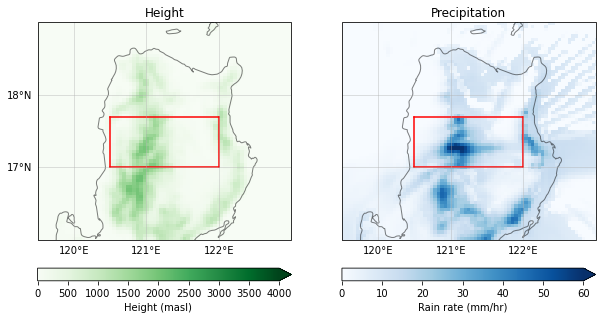

/tmp/ipykernel_623/3977660945.py:214: RuntimeWarning: Mean of empty slice
  to_np(np.nanmean(ua_cross_all, axis=0)[::qs, ::qs]),


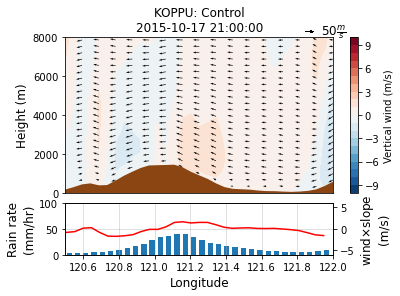

KOPPU
enha
2015-10-17 21:00:00


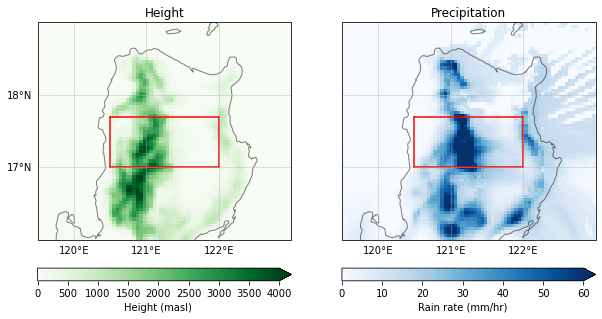

/tmp/ipykernel_623/3977660945.py:202: RuntimeWarning: Mean of empty slice
  np.nanmean(wa_cross_all, axis=0),
/tmp/ipykernel_623/3977660945.py:214: RuntimeWarning: Mean of empty slice
  to_np(np.nanmean(ua_cross_all, axis=0)[::qs, ::qs]),
/tmp/ipykernel_623/3977660945.py:215: RuntimeWarning: Mean of empty slice
  to_np(np.nanmean(wa_cross_all, axis=0)[::qs, ::qs]),


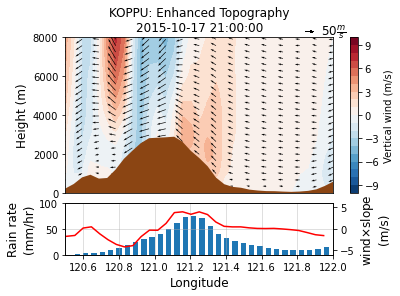

KOPPU
redu
2015-10-17 21:00:00


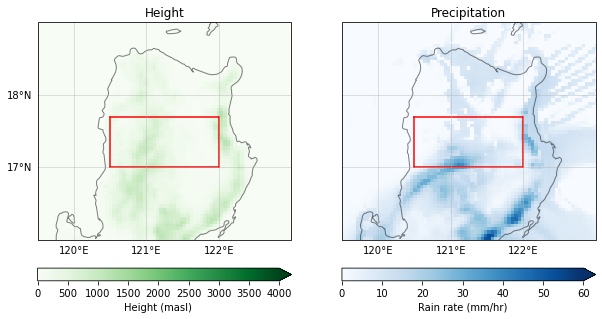

/tmp/ipykernel_623/3977660945.py:214: RuntimeWarning: Mean of empty slice
  to_np(np.nanmean(ua_cross_all, axis=0)[::qs, ::qs]),


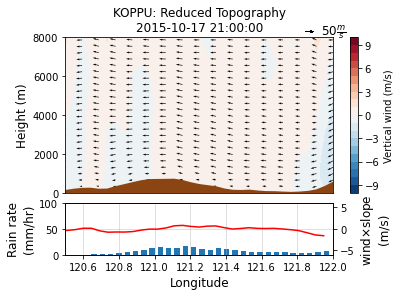

In [10]:
for tcname in ['KOPPU']:
    k = 2
    for expt in ['orig', 'enha','redu']:
#     for expt in ['enha']:    
        if expt=='orig':
            tc_ts = lf_list.loc[tcname].o_ts+k
        elif expt=='enha':
            tc_ts = lf_list.loc[tcname].e_ts+k
        elif expt=='redu':
            tc_ts = lf_list.loc[tcname].r_ts+k 
        print(tcname)
        print(expt)
        lvl = 7
        tc_path = os.path.join(wrf_path_base,tcname.lower()+'_'+expt)
        tc_list = os.listdir(tc_path)
        for wrf_ncs in tc_list:
            if wrf_ncs[0:10]=='wrfout_d02':
                wrf_nc = wrf_ncs
        tc_nc_path = os.path.join(tc_path, wrf_nc)

        ncfile = Dataset(tc_nc_path)
        #     wrf_times = g_times.get_times(ncfile,timeidx=wrf.ALL_TIMES)

        uv10 = getvar(ncfile, "uvmet10", units="m s-1", timeidx=tc_ts)
        wa = getvar(ncfile, "wa", units="m s-1", timeidx=tc_ts)
        hgt_m = getvar(ncfile, "ter", timeidx=tc_ts)
        ua_1km = getvar(ncfile, "ua", units="m s-1", timeidx=tc_ts)[lvl]
        va_1km = getvar(ncfile, "va", units="m s-1", timeidx=tc_ts)[lvl]
        ua = getvar(ncfile, "ua", units="m s-1", timeidx=tc_ts)
        ht = getvar(ncfile, "z", timeidx=tc_ts)

        lats, lons = latlon_coords(uv10)
        print(str(pd.to_datetime(str(uv10['Time'].values))))

        # get boxes
        xlong_c = uv10.XLONG.values[:,:]
        xlat_c = uv10.XLAT.values[:,:]

        lat_min_rain = 17.0
        lat_max_rain = 17.7
        lon_min_rain = 120.5
        lon_max_rain = 122.0      

        rainnc_inst = (getvar(ncfile, "RAINNC",timeidx=tc_ts)+getvar(ncfile, "RAINC",timeidx=tc_ts)) - (getvar(ncfile, "RAINNC",timeidx=tc_ts-1)+getvar(ncfile, "RAINC",timeidx=tc_ts-1))

        lat_min_rain = 17.0
        lat_max_rain = 17.7
        lon_min_rain = 120.5
        lon_max_rain = 122.0  

        q1_conds_mnt = (xlong_c >= lon_min_rain) & (xlong_c <= lon_max_rain) & (xlat_c >= lat_min_rain) & (xlat_c <= lat_max_rain)

        q1_up_lim_mnt = np.where(q1_conds_mnt == True)[0][0]
        q1_down_lim_mnt = np.where(q1_conds_mnt == True)[0][-1]
        q1_left_lim_mnt = np.where(q1_conds_mnt == True)[1][0]
        q1_right_lim_mnt = np.where(q1_conds_mnt == True)[1][-1]


        rr_crop = rainnc_inst[q1_up_lim_mnt:q1_down_lim_mnt, q1_left_lim_mnt:q1_right_lim_mnt]/3.
        rr_crop_latmean = np.nanmean(rr_crop, axis=0)

        h_mnt_crop = hgt_m[q1_up_lim_mnt:q1_down_lim_mnt, q1_left_lim_mnt:q1_right_lim_mnt]
        lat_list = np.linspace(lat_min_rain,lat_max_rain, h_mnt_crop.shape[0])

        ua_crop = ua[lvl, q1_up_lim_mnt:q1_down_lim_mnt, q1_left_lim_mnt:q1_right_lim_mnt]
        ua_line_mean = np.nanmean(ua_crop,axis=0)

        lat_list = np.linspace(lat_min_rain,lat_max_rain, h_mnt_crop.shape[0])

        cross_t_start = CoordPair(lat=lat_list[0], lon=lon_min_rain)
        cross_t_end = CoordPair(lat=lat_list[0], lon=lon_max_rain)

        wa_cross = vertcross(wa, ht, wrfin=ncfile,
                            start_point=cross_t_start,
                            end_point=cross_t_end,
                            latlon=True, meta=True)

        wa_cross_filled = np.ma.copy(wa_cross)
        ter_line = interpline(hgt_m, wrfin=ncfile, start_point=cross_t_start,
                              end_point=cross_t_end)

        reg_shp = h_mnt_crop.shape[0]
        wa_cross_all = np.zeros((reg_shp, wa_cross_filled.shape[0], wa_cross_filled.shape[1]))
        ua_cross_all = np.zeros((reg_shp, wa_cross_filled.shape[0], wa_cross_filled.shape[1]))
        ter_line_all = np.zeros((reg_shp, ter_line.shape[0]))

        fig = plt.figure(figsize=(10,6.5),
                                  facecolor='white')   

        ax1 = fig.add_subplot(121, facecolor='None', projection=crs)
        ax1.coastlines(resolution='10m', alpha=0.5)
        gl = ax1.gridlines(crs=crs, draw_labels=True, alpha=0.5)
        gl.top_labels = None
        gl.right_labels = None
        xgrid = np.arange(lon_min-10, lon_max+10, 1)
        ygrid = np.arange(lat_min-10, lat_max+10, 1)
        gl.xlocator = mticker.FixedLocator(xgrid.tolist())
        gl.ylocator = mticker.FixedLocator(ygrid.tolist())
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 10, 'color': 'black'}
        gl.ylabel_style = {'size': 10, 'color': 'black'}

        plot_hgt = ax1.pcolormesh(lons, lats, hgt_m, cmap='Greens', vmin=0, vmax=4000)

        ax1.plot([lon_min_rain,lon_max_rain], [lat_max_rain, lat_max_rain], transform=crs, color='red')
        ax1.plot([lon_min_rain,lon_max_rain], [lat_min_rain, lat_min_rain], transform=crs, color='red')
        ax1.plot([lon_min_rain,lon_min_rain], [lat_min_rain, lat_max_rain], transform=crs, color='red')
        ax1.plot([lon_max_rain,lon_max_rain], [lat_min_rain, lat_max_rain], transform=crs, color='red')
        cbar_ter = fig.colorbar(plot_hgt, ax=ax1, orientation='horizontal', fraction=0.049, pad=0.08, extend='max')
        cbar_ter.set_label('Height (masl)')

        ax1.set_xlim((119.5, 123))
        ax1.set_ylim((16, 19))
        ax1.set_title('Height')

        ax2 = fig.add_subplot(122, facecolor='None', projection=crs)
        ax2.coastlines(resolution='10m', alpha=0.5)
        gl = ax2.gridlines(crs=crs, draw_labels=True, alpha=0.5)
        gl.top_labels = None
        gl.right_labels = None
        gl.left_labels = None    
        xgrid = np.arange(lon_min-10, lon_max+10, 1)
        ygrid = np.arange(lat_min-10, lat_max+10, 1)
        gl.xlocator = mticker.FixedLocator(xgrid.tolist())
        gl.ylocator = mticker.FixedLocator(ygrid.tolist())
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 10, 'color': 'black'}
        gl.ylabel_style = {'size': 10, 'color': 'black'}

        plot_rain = ax2.pcolormesh(lons, lats, rainnc_inst/3.0, cmap='Blues', vmin=0, vmax=60)

        ax2.plot([lon_min_rain,lon_max_rain], [lat_max_rain, lat_max_rain], transform=crs, color='red')
        ax2.plot([lon_min_rain,lon_max_rain], [lat_min_rain, lat_min_rain], transform=crs, color='red')
        ax2.plot([lon_min_rain,lon_min_rain], [lat_min_rain, lat_max_rain], transform=crs, color='red')
        ax2.plot([lon_max_rain,lon_max_rain], [lat_min_rain, lat_max_rain], transform=crs, color='red')
        cbar_rain = fig.colorbar(plot_rain, ax=ax2, orientation='horizontal', fraction=0.049, pad=0.08, extend='max')
        cbar_rain.set_label('Rain rate (mm/hr)')

        ax2.set_xlim((119.5, 123))
        ax2.set_ylim((16, 19))
        ax2.set_title('Precipitation')    

    #     plt.title('Regions of Interest', fontsize='large')
    #     plt.legend(loc='upper right', fontsize='large')
        # plt.savefig(os.path.join(path_out, 'hgtrain_' + tcname.lower()+'_'+expt+'_'+str(tc_ts).zfill(2)+'.png'), bbox_inches='tight', dpi=300)
        plt.show()    

        for z in range(len(lat_list)):
        #     print(z)
            cross_t_start = CoordPair(lat=lat_list[z], lon=lon_min_rain)
            cross_t_end = CoordPair(lat=lat_list[z], lon=lon_max_rain)

            wa_cross = vertcross(wa, ht, wrfin=ncfile,
                                start_point=cross_t_start,
                                end_point=cross_t_end,
                                latlon=True, meta=True)

            wa_cross_filled = np.ma.copy(wa_cross)

            ua_cross = vertcross(ua, ht, wrfin=ncfile,
                                start_point=cross_t_start,
                                end_point=cross_t_end,
                                latlon=True, meta=True)

            ua_cross_filled = np.ma.copy(ua_cross)


            for i in range(wa_cross_filled.shape[-1]):
                column_vals = wa_cross_filled[:,i]
                # Let's find the lowest index that isn't filled. The nonzero function
                # finds all unmasked values greater than 0. Since 0 is a valid value
                # for dBZ, let's change that threshold to be -200 dBZ instead.
                first_idx = int(np.transpose((column_vals > -200).nonzero())[0])
                wa_cross_filled[0:first_idx, i] = wa_cross_filled[first_idx, i]

            # Get the terrain heights along the cross section line
            ter_line = interpline(hgt_m, wrfin=ncfile, start_point=cross_t_start,
                                  end_point=cross_t_end)

            wa_cross_all[z] = wa_cross_filled
            ua_cross_all[z] = ua_cross_filled    
            ter_line_all[z] = ter_line
        ter_line_mean = np.nanmean(ter_line_all,axis=0)
        dydx = np.gradient(ter_line_mean, 5000)
        # fig = plt.figure(figsize=(9,6), facecolor='white')
        # ax_wa = fig.add_subplot(2,1,1, facecolor='white')
        # ax_ra = fig.add_subplot(2,1,2, facecolor='white')

        fig, (ax_wa, ax_ra) = plt.subplots(2,1, gridspec_kw={'height_ratios': [3,1]}, figsize=(6,4), facecolor='white')

        # levels = np.linspace(-15, 15, 21)
        levels = np.linspace(-10, 10, 21)
        # xs = np.arange(0, wa_cross.shape[-1], 1)
        coord_pairs = to_np(wa_cross.coords["xy_loc"])        
        x_labels_bar = [float(pair.lon) for pair in to_np(coord_pairs)]        
        xs = np.linspace(0,111139*(x_labels_bar[-1]-x_labels_bar[0]), wa_cross.shape[-1])
        ys = to_np(wa_cross.coords["vertical"])

        wa_contours = ax_wa.contourf(xs, ys,
                                         np.nanmean(wa_cross_all, axis=0),
                                         20,levels=levels,
                                         cmap=get_cmap("RdBu_r"))

        # Add the color bar
        cb_wa = fig.colorbar(wa_contours, ax=ax_wa)
        cb_wa.ax.tick_params(labelsize=10)
        cb_wa.set_label('Vertical wind (m/s)')

        qs = 2

        Q = ax_wa.quiver(xs[::qs], ys[::qs],
                     to_np(np.nanmean(ua_cross_all, axis=0)[::qs, ::qs]), 
                     to_np(np.nanmean(wa_cross_all, axis=0)[::qs, ::qs]),
                     scale=.01, scale_units='xy', angles='xy')


        qk = ax_wa.quiverkey(Q, 0.7, 0.9, 50, r'$50 \frac{m}{s}$', labelpos='E',
                           coordinates='figure', fontproperties = {'size':12},
                           angle=0, labelsep=.1)

        # Fill in the mountain area
        ht_fill = ax_wa.fill_between(xs, -30, ter_line_mean,
                                        facecolor="saddlebrown")    

        # line_1km = ax_wa.plot(xs, ter_line_mean+1000, alpha=0.25, color='k')

        # Set the x-ticks to use latitude and longitude labels

        x_ticks = np.arange(coord_pairs.shape[0])

        # Set the desired number of x ticks below
        num_ticks = 5
        thin = int((len(x_ticks) / num_ticks) + .5)

        x_labels = [str(pair.lon)[0:6] for pair in to_np(coord_pairs)]

        # Set the x-axis and  y-axis labels
        ax_wa.set_ylabel("Height (m)", fontsize=12)
        ax_wa.set_ylim([0,8000])
        ax_wa.set_title(tcname + ': ' + exptnames[expt] + '\n'+
                        str(pd.to_datetime(str(wa['Time'].values)))
                       )
        ax_wa.set_xticklabels([])
        ax_wa.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

        ax_ra.grid(alpha=0.5)
        ax_ra.bar(x_labels_bar[:-1], rr_crop_latmean, align='edge', width=0.03, label='Rain rate')
        ax_ra.plot([],[], color='red',label=r'wind$\times$slope')
        ax_ra.set_ylabel("Rain rate\n(mm/hr)", fontsize=12)
        ax_ra.set_ylim([0,100])
        ax_ra.set_xlim([lon_min_rain,lon_max_rain])


        cb_ra = fig.colorbar(wa_contours, ax=ax_ra, drawedges=False, ticks=None)
        cb_ra.ax.tick_params(labelsize=10)
        cb_ra.set_label('', color='white')
        cb_ra.ax.yaxis.set_tick_params(color='white')
        cb_ra.set_alpha(0.0)
        cb_ra.outline.set_edgecolor(color='white')
        plt.setp(plt.getp(cb_ra.ax.axes, 'yticklabels'), color='white')

        cb_ra.draw_all()
        # cb_ra.remove()

        ax_ra.set_xlabel("Longitude", fontsize=12)

        ax_u = ax_ra.twinx()
        ax_u.set_ylabel(r'wind$\times$slope'+'\n(m/s)', fontsize=12)
        ax_u.plot(x_labels_bar[:-1], ua_line_mean*dydx[1:], color='red',label=r'wind$\times$slope')
        #     ax_u.set_ylim([-6,6])    
        ax_u.set_ylim([-6,6])     

        # ax_ra.subplots_adjust(right=.8)
        # cb_ra.remove()
        plt.subplots_adjust(hspace=.1)
        plt.savefig(os.path.join(path_out, 'xsrruvw_' + tcname.lower()+'_'+expt+'_'+str(tc_ts).zfill(2)+'.png'), bbox_inches='tight', dpi=300)
        plt.show()